In [82]:
import pandas as pd
from numpy import loadtxt
from xgboost import XGBRegressor
from xgboost import plot_importance
from datetime import datetime as dt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import datetime as dt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving london_sample.csv to london_sample.csv


In [ ]:
import io
london = pd.read_csv(io.BytesIO(uploaded['london_sample.csv']))

In [ ]:
london['month'] = pd.to_datetime(london['month'])
london['month'] = london['month'].astype(int)

london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 23 columns):
 #   Column                                                     Non-Null Count   Dtype  
---  ------                                                     --------------   -----  
 0   month                                                      200000 non-null  int64  
 1   longitude                                                  200000 non-null  float64
 2   latitude                                                   200000 non-null  float64
 3   lsoa_code                                                  200000 non-null  int64  
 4   stringency                                                 200000 non-null  float64
 5   covid                                                      200000 non-null  int64  
 6   last_outcome_investigation_complete_no_suspect_identified  200000 non-null  int64  
 7   last_outcome_category_status_update_unavailable            200000 non-null  int64  

In [ ]:
# feature importance can be found using decision tree algos since you can derive info on how 
# relevant each feature was for making the decisions
# xGboost is used here because it is shown to be better than other methods 

X = london.iloc[:,0:22]
y = london.iloc[:,-1:]

X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=100, test_size=0.3)

# fit model 
xg_london = XGBRegressor(n_estimators=100)
xg_london.fit(X_train, y_train)
y_pred = xg_london.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


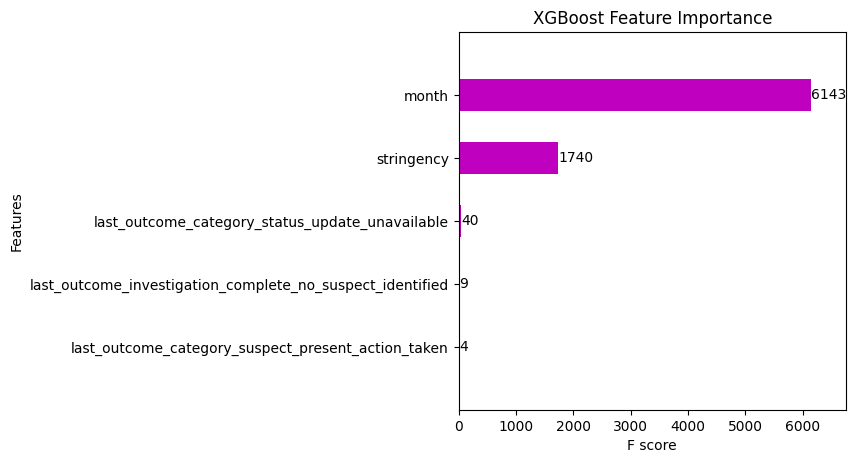

In [ ]:
# plot feature importance
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
plot_importance(xg_london, ax=ax, grid=False, title='XGBoost Feature Importance', importance_type='weight', height=0.5, color='m')
plt.show()

In [ ]:
# xgboost seems to give importance to only two features so lets try random forests;

In [ ]:
# RF

# fit model 
rf_london = RandomForestRegressor(n_estimators=100)
rf_london.fit(X_train, y_train)
y_pred = rf_london.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


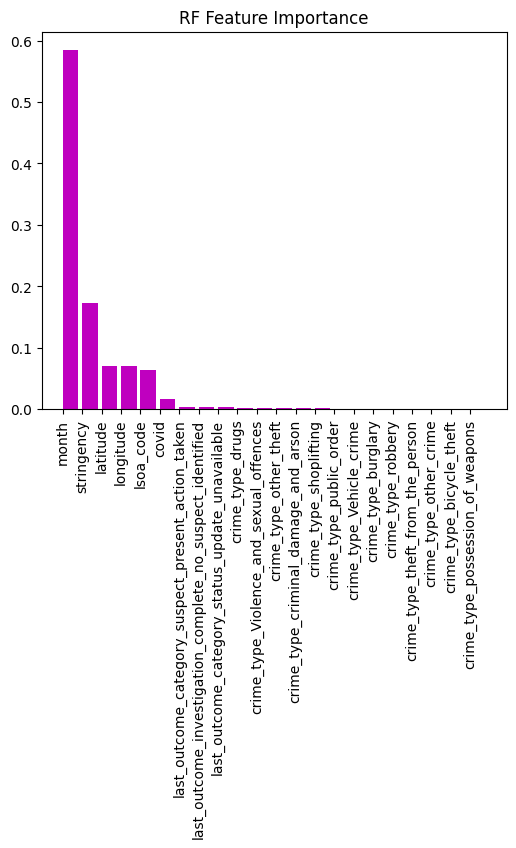

In [ ]:
feature_importance = rf_london.feature_importances_

# sorting features in descending order
sorted_feats = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(6, 5), dpi=100)
plt.title('RF Feature Importance')
plt.bar(range(X_train.shape[1]), feature_importance[sorted_feats], align='edge', color='m')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_feats], rotation=90)
plt.show()

In [ ]:
# Other Cities 

In [90]:
from google.colab import files
uploaded = files.upload()

Saving other_cities_sample.csv to other_cities_sample (3).csv


In [91]:
other = pd.read_csv(io.BytesIO(uploaded['other_cities_sample.csv']))

In [92]:
other['month']= pd.to_datetime(other['month'])
other['month'] = other['month'].map(dt.datetime.toordinal)

In [93]:
X_other = other.iloc[:,0:22]
y_other = other.iloc[:,-1:]

X_train, X_test, y_train, y_test  = train_test_split(X_other, y_other, random_state=100, test_size=0.3)

# fit model 
xg_other = XGBRegressor(n_estimators=100)
xg_other.fit(X_train, y_train)
y_pred = xg_other.predict(X_test)

[17:31:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [94]:
y_other

,crimes_count
0,26435
1,30681
2,29451
3,26022
4,27649
...,...
199995,23219
199996,28698
199997,29961
199998,26022


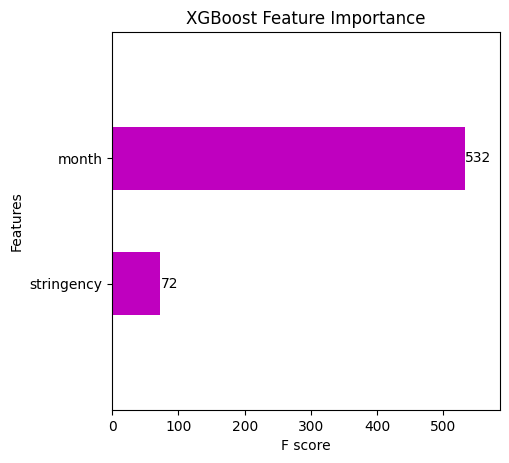

In [95]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
plot_importance(xg_other, ax=ax, grid=False, title='XGBoost Feature Importance', importance_type='weight', height=0.5, color='m')
plt.show()

In [96]:
rf_other = RandomForestRegressor(n_estimators=100)
rf_other.fit(X_train, y_train)
y_pred = rf_other.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


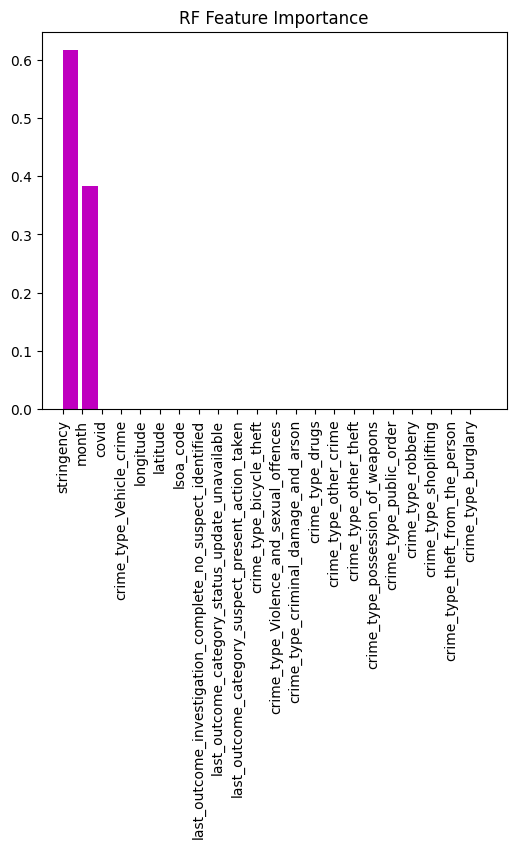

In [97]:
feature_importance = rf_other.feature_importances_

sorted_feats = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(6, 5), dpi=100)
plt.title('RF Feature Importance')
plt.bar(range(X_train.shape[1]), feature_importance[sorted_feats], align='edge', color='m')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_feats], rotation=90)
plt.show()